using pca and lda model
(9377, 31)
Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] END .....................C=0.1, gamma=0.001, kernel=rbf; total time=   1.6s
[CV] END .....................C=0.1, gamma=0.001, kernel=rbf; total time=   1.6s
[CV] END .....................C=0.1, gamma=0.001, kernel=rbf; total time=   1.6s
[CV] END .....................C=0.1, gamma=0.001, kernel=rbf; total time=   1.7s
[CV] END .....................C=0.1, gamma=0.001, kernel=rbf; total time=   1.7s
[CV] END ....................C=0.1, gamma=0.0001, kernel=rbf; total time=   2.6s
[CV] END ....................C=0.1, gamma=0.0001, kernel=rbf; total time=   2.5s
[CV] END ....................C=0.1, gamma=0.0001, kernel=rbf; total time=   2.6s
[CV] END ....................C=0.1, gamma=0.0001, kernel=rbf; total time=   2.5s
[CV] END ....................C=0.1, gamma=0.0001, kernel=rbf; total time=   2.7s
[CV] END .....................C=0.1, gamma=scale, kernel=rbf; total time=   0.8s
[CV] END ....

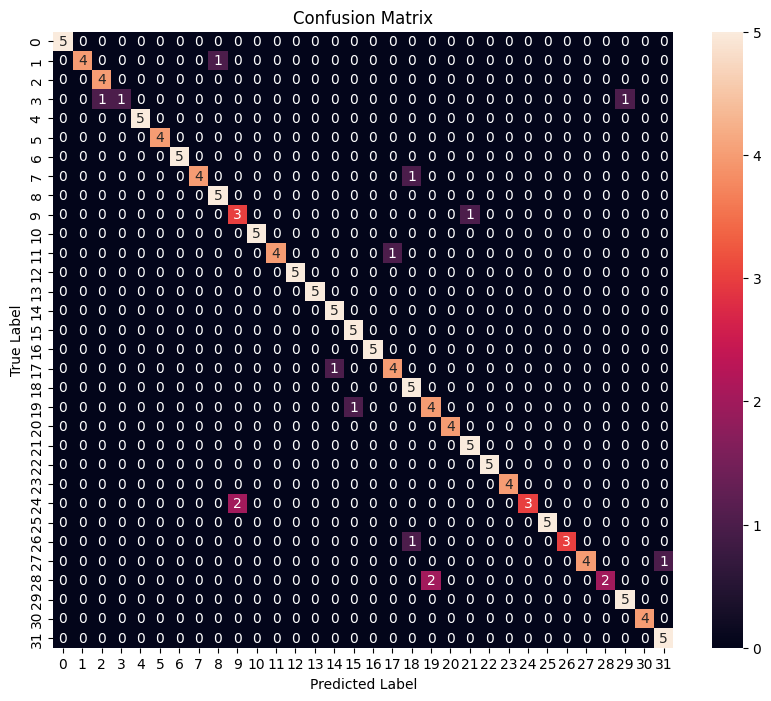

Accuracy: 0.9992534925882478 0.9066666666666666


In [48]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import numpy as np
import pickle
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV

resolution = 50
variance = 99
data_dir = f'dimension_reduced_data_{resolution}_res_{variance}_var'
use_pca = True
use_lda = True

if use_pca and not use_lda:
    print('using pca model')
    X_train = np.load(f'{data_dir}/X_train_pca.npy')
    X_val = np.load(f'{data_dir}/X_val_pca.npy')

elif use_lda and not use_pca:
    print('using lda model')
    X_train = np.load(f'{data_dir}/X_train_lda.npy')
    X_val = np.load(f'{data_dir}/X_val_lda.npy')

elif use_pca and use_lda:
    print('using pca and lda model')
    X_train = np.load(f'{data_dir}/X_train_pca_lda.npy')
    X_val = np.load(f'{data_dir}/X_val_pca_lda.npy')

y_train = np.load(f'{data_dir}/y_train.npy')
y_val = np.load(f'{data_dir}/y_val.npy')

print(X_train.shape)
param_grid = {
    'C': [0.1, 1, 10, 100],  # Example values, should be expanded based on the specific problem
    'gamma': [0.001, 0.0001, 'scale', 'auto'],  # Example values plus 'scale' and 'auto'
    'kernel': ['rbf']
}


svc = SVC()
model = GridSearchCV(svc, param_grid, cv=5, verbose=2)  # 5-fold cross-validation
model.fit(X_train, y_train)

yp = model.predict(X_train)
training_accuracy = accuracy_score(y_train, yp)

yp = model.predict(X_val)


cm = confusion_matrix(y_val, yp)

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d")
plt.title("Confusion Matrix")
plt.ylabel("True Label")
plt.xlabel("Predicted Label")
plt.show()



validation_accuracy = accuracy_score(y_val, yp)

print("Accuracy:",training_accuracy, validation_accuracy)
